source: http://scs.ryerson.ca/~aharley/vis/

* 論文中關於 fully-connected network 描述  
  "a fully-connected network was trained, with 784 nodes on the bottom
layer (corresponding to pixels),  
300 nodes in the first hidden layer,  
100 nodes in the second hidden layer, and  
10 nodes in the output layer (corresponding to the 10 digits). "   
<br>
* input layer: 784 = 28 x 28 pixels
* layer 1: fc, 300 nodes
* layer 2: fc, 100 nodes
* output layer 3: fc, 10 nodes
* 整篇論文並沒有說明採用哪種 activation function, loss function, optimizer

In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop
from matplotlib import pyplot as plt
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [2]:
# download the mnist to the path '~/.keras/datasets/' if it is the first time to be called
# X shape (60,000 28x28), y shape (10,000, )
(X_train_org, y_train), (X_test_org, y_test) = mnist.load_data()

print X_train_org.shape
print X_test_org.shape

(60000, 28, 28)
(10000, 28, 28)


In [3]:
# data pre-processing
X_train = X_train_org.reshape(X_train_org.shape[0], -1) / 255.   # normalize
X_test = X_test_org.reshape(X_test_org.shape[0], -1) / 255.      # normalize
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

print X_train.shape

(60000, 784)


Layer len:3


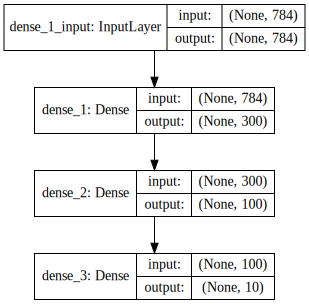

In [4]:
model = Sequential()
model.add(Dense(300, activation='relu', input_dim=784))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
          
#model.summary()
print("Layer len:%d" % (len(model.layers)))
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [5]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
print('Training ------------')
model.fit(X_train, y_train, epochs=5, batch_size=32)

Training ------------
Epoch 1/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.5770 - acc: 0.8497
Epoch 2/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.2771 - acc: 0.9220
Epoch 3/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.2248 - acc: 0.9367
Epoch 4/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.1909 - acc: 0.9456
Epoch 5/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.1656 - acc: 0.9526


In [7]:
print('Testing ------------')
loss, accuracy = model.evaluate(X_test, y_test)

print('test loss: ', loss)
print('test accuracy: ', accuracy)

Testing ------------
10000/10000 [==============================] - 0s 26us/step
('test loss: ', 0.1569393065318465)
('test accuracy: ', 0.9553)


y_test[0]:array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])
predict[0]:array([6.9380520e-05, 3.6677741e-07, 2.9736315e-03, 3.3913122e-03,
       1.1633873e-06, 3.9264643e-05, 8.3931848e-09, 9.9339044e-01,
       3.4936154e-05, 9.9619087e-05], dtype=float32)


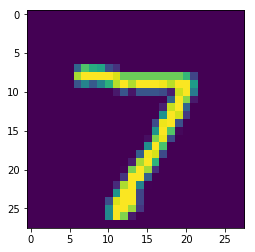

In [8]:
my_test = X_test[0].reshape(1, X_test.shape[1])
predict = model.predict(my_test)

print("y_test[0]:%r" % (y_test[0]))
print("predict[0]:%r" % (predict[0]))
plt.imshow(X_test_org[0])